![title](./media/walmart_christmas.jpg)

# Walmart: Weihnachtsgeschäft Just in Time

Modulprojekt für die Vorlesung __Data-Mining-Process__

_Dozent:_ Prof. Dr. Johannes Maucher  
_Studenten:_ Stephanie Flohr, Benedikt Haußner, Robert Masendorf

Für unser Projekt analysiseren wir Verkaufsdaten der amerikanischen Supermarktkette _Walmart_.

## BUSINESS UNDERSTANDING: Ursprung und grober Inhalt des Datensatzes

### Was ist Walmart?
Walmart ist der wertvollste Einzelhändler der Welt mit einer Marktkapitalisierung von 246,2 Mrd. US-Dollar. Weitere Fakten:
+ Anzahl Filialen weltweit: ca 11.600
+ Jahresumsatz 2017: 50,3 Mrd. US-Dollar
+ Gewinn 2017: 9,9 Mrd. US-Dollar
+ Anzahl der Mitarbeiter weltweit: ca 2 Millionen

Quelle: [Wikipedia](https://de.wikipedia.org/wiki/Walmart)

### _Just in Time_ bei Walmart
__TODO:__ Kurz erklären, warum JIT bei Walmart so wichtig ist! Dazu auch Infos bei Wiki.
+ Anzahl der Analysten weltweit: ca 2000

### Wettbewerb auf Kaggle
__TODO:__ Hier eine Kurze Beschreibung einfügen mit Link zum Wettbewerb: [Walmart - Store Sales Forecasting](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting).
+ was enthält der datensatz
+ wir machen NICHT die Competition

### Ziel unserer Arbeit
__TODO:__ Ausführlicher Beschreiben Es ist unser Ziel, aus Daten der Jahre 2010 und 2011 eine Prognose für die Verkaufszahlen des Jahres 2011 zu ermitteln.

## DATA UNDERSTANDING: Was wissen wir und was wollen wir wissen?

### Inhalte der Quell-Dateien

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

__TODO:__ 
+ alle Dateien kurz listen
+ alle Dateien head anschauen
+ alle gegebenen Attribute beschreiben

In [4]:
data = pd.read_csv('./data/train.csv')
dataDf = pd.DataFrame(data)
display(dataDf.head())
dataDf.dtypes

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

### Univariate Analyse

__TODO:__ 
+ für die relevanten attribute die Verteilung ect anschauen
+ Qulitätsanalyse: fehlen Werte ect?
+ auf jeden Fall eine hübsche Grafik mit Bokeh!

In [8]:
dataDf.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

### Analyse: wollen wir evtl noch weitere externe Daten einbeziehen?

__TODO:__ 
+ eine andere Quelle wäre evtl ganz cool, aber nur, wenn uns was leichtes einfällt

## DATA PREPARATION: was wollen wir verwenden und wie?

### inhaltlicher Zuschnitt der Daten aufs Projektziel

__TODO:__ 
+ Feature Selection
+ Feature Enigneering

__TODO:__ 
+ kurze Erklärung, was in diesem Kapitel passieren soll

### zeitlicher Zuschnitt der Daten auf das Projektziel

__TODO:__ 
+ warum wir nicht einfach mit allen Daten arbeiten
+ weshalb wir die Monate ausgewählt haben, die wir ausgewählt haben

__TODO:__ 
+ Begründung, warum wir manuell splitten

In [5]:
dataDf.Date = pd.to_datetime(dataDf.Date)
dataDf.head()
dataDf.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [6]:
train_df = dataDf[((dataDf.Date >= '2010-09-01') & (dataDf.Date <= '2010-12-31')) | ((dataDf.Date >= '2011-09-01') & (dataDf.Date <= '2011-11-30'))]
train_df.reset_index(inplace=True, drop=True)

In [7]:
train_df.loc[(train_df['Store'] == 1) & (train_df['Dept'] ==1)]

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-09-03,16241.78,False
1,1,1,2010-09-10,18194.74,True
2,1,1,2010-09-17,19354.23,False
3,1,1,2010-09-24,18122.52,False
4,1,1,2010-10-01,20094.19,False
5,1,1,2010-10-08,23388.03,False
6,1,1,2010-10-15,26978.34,False
7,1,1,2010-10-22,25543.04,False
8,1,1,2010-10-29,38640.93,False
9,1,1,2010-11-05,34238.88,False


In [8]:
test_df = dataDf[(dataDf.Date >= '2011-12-01') & (dataDf.Date <= '2011-12-31')]
test_df.reset_index(inplace=True, drop=True)

In [8]:
test_df.loc[(test_df['Store'] == 1) & (test_df['Dept'] ==1)]

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2011-12-02,25293.49,False
1,1,1,2011-12-09,33305.92,False
2,1,1,2011-12-16,45773.03,False
3,1,1,2011-12-23,46788.75,False
4,1,1,2011-12-30,23350.88,True


In [9]:
train_df.plot(x='Date', y='Weekly_Sales', figsize=(15,10), secondary_y='Dept')

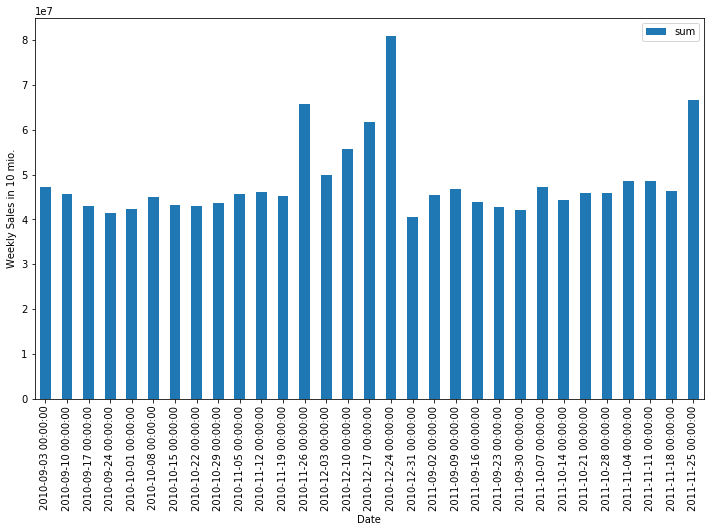

In [20]:
train_df.groupby('Date').agg(['sum']).reset_index().plot(x='Date', y='Weekly_Sales',kind="bar", figsize=(12,7)).set_ylabel("Weekly Sales in 10 mio.")
plt.show()

__TODO:__ 
+ Ergebnisbeschreibung, warum wir denken, hier evtl weiterzukommen

### hier auf Sliding Window eingehen?

__TODO:__ 
+ irgendwo müssen wir erklären, was das ist und wie es geht. 
+ am besten evtl hier, so hat man nicht am anfang nur theorie. 
+ und dann gleich mit python umsetzen. 
+ ein tutorial (weiß nciht, obs was taugt): [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)

## MODELING

__TODO:__ 
+ Hier wollen wir sowohl mit Baum, als auch mit Netz arbeiten. 
+ Wir sollten mit der Grafik von scikit-learn begründen, warum wir welche Technik nutzen [hatten wir schonmal](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

## EVALUATION

__TODO:__ 
+ was sind hier gute maßzahlen?

## DEPLOYMENT

__TODO:__ 
+ brauchen wir den schritt überhaupt?
+ evtl stattdessen einfach: __LESSONS LEARNED__ und __IDEEN FÜR DIE ZUKUNFT__ machen oder so